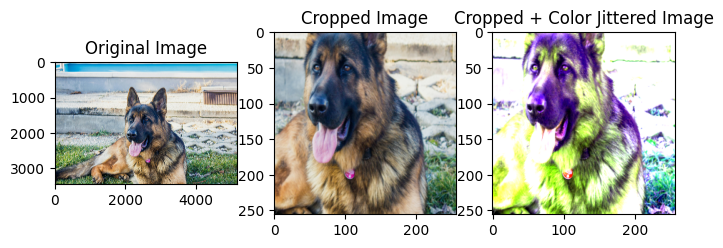

In [6]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Seed for reproducibility
# torch.manual_seed(5)

# Define the random crop transformation (deterministic)
crop_transform = transforms.RandomResizedCrop(size=256, scale=(0.08, 1.0), ratio=(3/4, 4/3))

# Define the color jitter transformation (deterministic)
color_jitter_transform = transforms.ColorJitter(brightness=0.8, contrast=0.8, saturation=0.8, hue=0.2)

# Define a ToTensor and ToPILImage transformation
to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

# Function to apply crop, save cropped image, then apply color jitter and save that image
def apply_deterministic_transform(image_path):
    # Load image
    img = Image.open(image_path).convert('RGB')
    
    # Apply the random crop transformation
    cropped_img = crop_transform(img)
    
    # Apply the color jitter transformation to the cropped image
    jittered_img = color_jitter_transform(cropped_img)
    
    # Save cropped image
    cropped_img.save('cropped_image.jpg')
    
    # Save cropped + jittered image
    jittered_img.save('cropped_jittered_image.jpg')
    
    return cropped_img, jittered_img

# Example usage
image_path = 'img/dog2.jpg'  # Replace with your image path
cropped_img, jittered_img = apply_deterministic_transform(image_path)

# Visualize the results
plt.figure(figsize=(8,4))

plt.subplot(1,3,1)
plt.imshow(to_pil(to_tensor(Image.open(image_path))))
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(cropped_img)
plt.title("Cropped Image")

plt.subplot(1,3,3)
plt.imshow(jittered_img)
plt.title("Cropped + Color Jittered Image")

plt.show()




In [4]:
cropped_img.save('img/dog3_cropped.jpg')
jittered_img.save('img/dog3_cropped_jittered.jpg')